# Decision Trees

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### Preparations

In [2]:
df = pd.read_csv('penguins_simple.csv', sep=';')
df.dropna(inplace=True)

#### 1. Inspect the size of the dataset

In [3]:
df.shape

(333, 6)

In [4]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


#### 2. Select the Species column to use as target

In [5]:
y = df['Species']

#### 3. Select two columns to use as input features

In [6]:
X = df[['Culmen Length (mm)', 'Culmen Depth (mm)']]

In [7]:
X.head()

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6


#### 4. Plot the data

In [9]:
plt.rcParams['figure.figsize'] = (12,6)

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

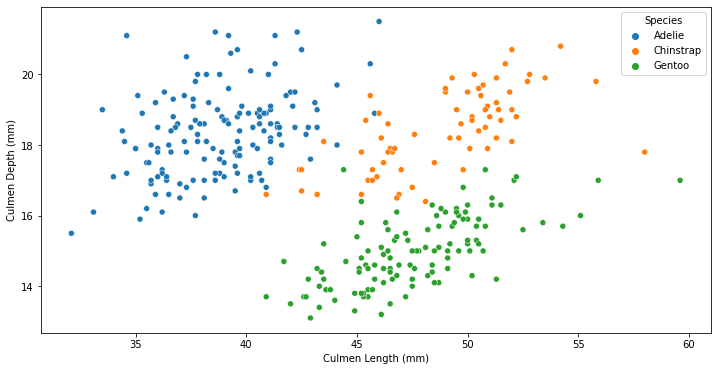

In [10]:
sns.scatterplot(x=X['Culmen Length (mm)'], y=X['Culmen Depth (mm)'], hue=y)

## Decision Tree from Scratch

#### 5. Make one prediction for every penguin

In [11]:
for i, row in X.iterrows():
    print(i)
    print(row)
    break

0
Culmen Length (mm)    39.1
Culmen Depth (mm)     18.7
Name: 0, dtype: float64


In [12]:
X.head()

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6


In [13]:
predictions = []
for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['Culmen Length (mm)'] < 44:
        predictions.append('Adelie')
    else:
        if row['Culmen Depth (mm)'] < 16:
            predictions.append('Gentoo')
        else:
            predictions.append('Chinstrap')

#### 6. Calculate the accuracy of the model

In [15]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y, predictions), 2)

0.86

## Find the optimal separation with Scikit

#### 7. Train the model

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
m = DecisionTreeClassifier(max_depth=2)  # we allow that many questions
m.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [43]:
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

#### 8. Make predictions

In [44]:
ypred = m.predict(X)

In [45]:
ypred

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie

#### 9. Calculate the accuracy

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print(f'The accuracy of the sklearn model is {round(accuracy_score(y, ypred), 2)}')

The accuracy of the sklearn model is 0.93


## Plot the tree

#### 10. Plot the tree with according labels

In [48]:
X.columns

Index(['Culmen Length (mm)', 'Culmen Depth (mm)'], dtype='object')

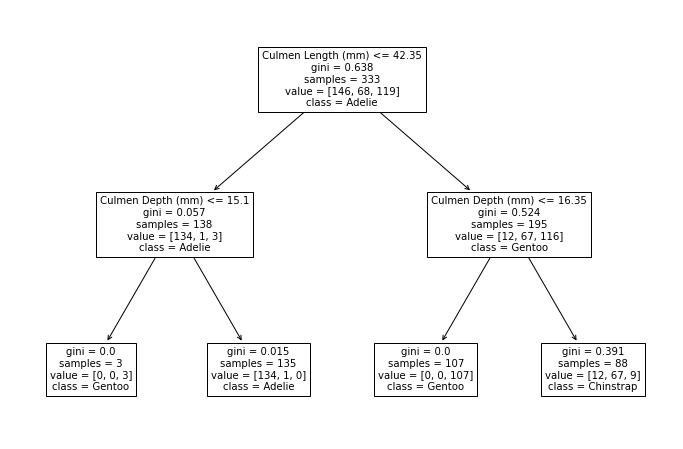

In [50]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=X.columns, class_names=y.unique())

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

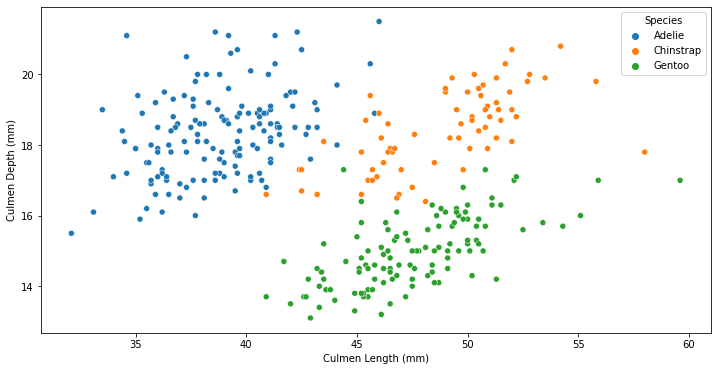

In [31]:
sns.scatterplot(x=X['Culmen Length (mm)'], y=X['Culmen Depth (mm)'], hue=y)

- A decision tree model will ask the question that leads to the biggest decrease in Gini impurity

**What is Gini impurity?**


It is a measure of information impurity

$$
GINI = \sum_{k=1}^{K}{(p_k (1 - p_k))}
$$

where **K** is the set of classes that we want to predict and

$$
p_k
$$

is the ratio of all data points that belong to class *k* over the total number of data points in that set.

The optimal gini impurity that a decision tree can achieve is 0.

In [25]:
df.Species.value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: Species, dtype: float64

In [26]:
gini_root = 0.44 * (1-0.44) + 0.35*(1-0.35) + 0.2*(1-0.2)

In [27]:
gini_root

0.6339